In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [7]:
x = df[['cgpa','iq']]
y = df['placement']

In [8]:
# scalling data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

# Input layer + first hidden layer
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dropout(0.3))   # dropout for regularization

# Second hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from keras.callbacks import EarlyStopping

history = model.fit(x_train, y_train, epochs=1000 , validation_data= (x_test, y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=5)])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.6914 - loss: 0.5937 - val_accuracy: 0.8000 - val_loss: 0.6149
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7477 - loss: 0.6251 - val_accuracy: 0.7500 - val_loss: 0.6061
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6852 - loss: 0.6295 - val_accuracy: 0.8000 - val_loss: 0.5973
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7977 - loss: 0.5641 - val_accuracy: 0.8000 - val_loss: 0.5885
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6867 - loss: 0.5842 - val_accuracy: 0.8000 - val_loss: 0.5800
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7289 - loss: 0.5518 - val_accuracy: 0.8500 - val_loss: 0.5718
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7875 - loss: 0.5490 - val_accuracy: 0.8500 - val_loss: 0.5641
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7445 - loss: 0.6004 - val_accuracy: 0.8500 - 

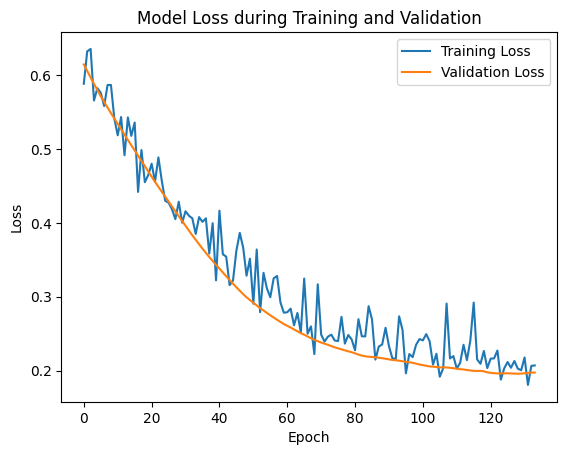

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()